# SOFR Strip Term Rates Example Notebook

This workbook will demonstrate using the datamine python package to retrieve CME SOFR Strip Term Rates.

This is a working example for reference and is a starting point for more advanced use cases.  This workbook will demonstrate the following workflow
1. Credentialling into Datamine.
2. Retrieving your data catalog of SOFR Strip Term Rates. 
3. Visualize the SOFR Strip Rates data.
3. Export the aggregate data into CSV file / Excel.


In [85]:
import datamine.io as dm
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import warnings
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

style.use('fivethirtyeight')
%matplotlib inline

In [86]:
#Establish an object to interact with CME Datamine.
#Supply Credentials per Documentation: http://www.cmegroup.com/market-data/datamine-api.html
myDatamine = dm.DatamineCon(username='API_SECDEV', password='Dec2019^', path='../data/')

## Get Your Catalog of SOFR Strip Rate Data

Datamine hosts all your subscriptions for download which you can see in the GUI.  https://datamine.cmegroup.com/

The following code will download a catalog of all your items.  We will turn that into a Pandas DataFrame to see what data we have in our account.


In [77]:
#Get your data catalog from Datamine
myDatamine.get_catalog(dataset='SOFR')

get_catalog: retrieving SOFR, limit None
get_catalog: 2424 records downloaded, 0 duplicates, 2424 saved


## Using the Data 

The following will show you example of how the Datamine python module can be used to copy down the data from the cloud to your local computer.  

This routine will download the data to the /data/* folder for each specific data set.  This routine copies everything down and overwrites anything locally.  This routine will take time depending upon the amount of data on the cloud that your trying to pull down.  The pulls are multithreaded to speed them up; you can adjust this by adjusting the processes in the MyDatamine object.

```myDatamine.processes = 4```

### Load Data

The following section will download the SOFR OIS from Datamine, load the data into a properly typed Pandas DataFrame.  If this is the first time, there many be a lot of historical data avaliable that must be downloaded from Datamine to your local machine.  The downloads are multithreaded to speed up the I/O.  You can also specify 'download=False' in the function which will read the data from your local machine only.  

Load from Disk Only:
```myDatamine.sofrois_load(download=False)```

In [124]:
# Load the SOFR term rates from datamine cloud and structure into dataframe of myDatamine.sofrsr_DF.  
myDatamine.sofrois_load(download=False)

reading SOFR data: 100%|██████████| 2424/2424 [00:11<00:00, 218.57it/s]
concatenating 2424 dataframes


In [125]:
#look at the data frame
myDatamine.sofrois_DF.head()

,Trade Date,Exchange Code,Currency,Commodity Code,Short Description,Long Description,Curve Date,Offset,Discount Factor,Forward rate,Rate
0,2008-09-02 00:00:00+00:00,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,20080903,1,0.999953,NaN,0.017311
1,2008-09-02 00:00:00+00:00,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,20080904,2,0.999903,NaN,0.017656
2,2008-09-02 00:00:00+00:00,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,20080905,3,0.999854,NaN,0.017772
3,2008-09-02 00:00:00+00:00,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,20081202,91,0.995503,NaN,0.018090
4,2008-09-02 00:00:00+00:00,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,20090304,183,0.990933,NaN,0.018180


## Review Single Day of OIS Curve

Since we loaded all the historical data, we will look at a single day of data.  

In [126]:
DF = myDatamine.sofrois_DF.copy()
DF['Trade Date'] = DF['Trade Date'].dt.date  # Convert this to a simple date.

In [127]:
mapper = DF['Trade Date'] == DF['Trade Date'].max()
oneDayDF = DF.loc[mapper]
oneDayDF['Curve Date'] = pd.to_datetime(oneDayDF['Curve Date'].astype(int),format='%Y%m%d')
oneDayDF.tail()

,Trade Date,Exchange Code,Currency,Commodity Code,Short Description,Long Description,Curve Date,Offset,Discount Factor,Forward rate,Rate
58171,2018-05-04,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,2030-05-04,4383,0.723380,NaN,0.026985
58172,2018-05-04,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,2033-05-04,5479,0.665670,NaN,0.027130
58173,2018-05-04,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,2038-05-04,7305,0.581940,NaN,0.027069
58174,2018-05-04,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,2043-05-04,9131,0.511265,NaN,0.026835
58175,2018-05-04,XCME,USD,NaN,NaN,USD-SOFR-OIS-COMPOUND 1D,2048-05-04,10958,0.452174,NaN,0.026455


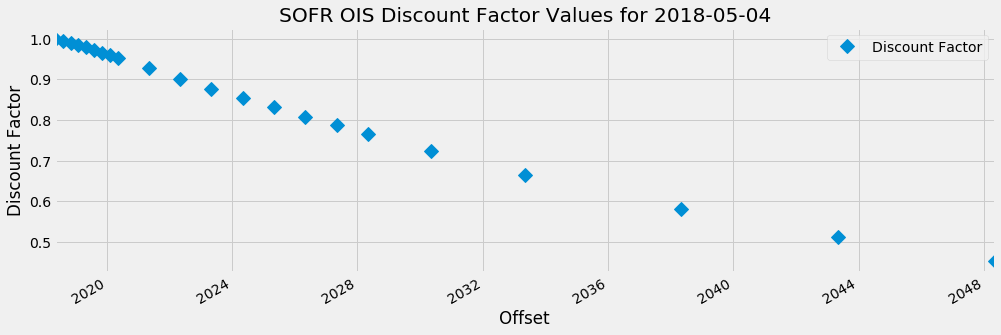

In [128]:
#Graph of Data
oneDayDF[['Curve Date','Discount Factor']].set_index('Curve Date').plot(figsize=[15,5], marker='D',markersize=10,linestyle='None')
plt.title('SOFR OIS Discount Factor Values for %s' % oneDayDF['Trade Date'].max() )
plt.xlabel('Offset')
plt.ylabel('Discount Factor')
plt.style.use('fivethirtyeight')
plt.savefig('./images/SOFROISCurve.png')
plt.show()

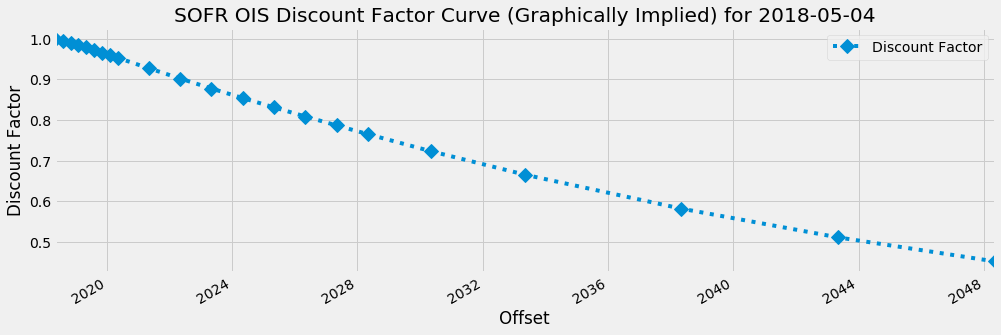

In [129]:
#Graph of Data
oneDayDF[['Curve Date','Discount Factor']].set_index('Curve Date').plot(figsize=[15,5], marker='D',markersize=10,linestyle=':')
plt.title('SOFR OIS Discount Factor Curve (Graphically Implied) for %s' % oneDayDF['Trade Date'].max() )
plt.xlabel('Offset')
plt.ylabel('Discount Factor')
plt.style.use('fivethirtyeight')
plt.savefig('./images/SOFROISCurve.png')
plt.show()

## Export to Local CSV




In [170]:
myDatamine.sofrois_DF.to_csv('CME_OIS.csv')